<img src="Tut 2.1.png" width="900" />

In [69]:
from numpy import log, array, exp, linspace, asarray, argmax, interp, append
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
#elementary
#irreversible
#liquid
#adiabatic
#equimolar feed at 27°C

In [112]:
R      =       8.314 #kPa.m3/kmol.K
CpA    =    15*4.187 #J/mol.K
CpB    =         CpA
CpC    =       2*CpA
delHrx = -6000*4.187 #J/mol
K300   =        0.01 #L/mol.s at 300K
Ea     = 10000*4.187 #J/mol
Q      =           2 #L/s
CAo    =         0.1 #mol/s
CBo    =         CAo
FAo    =       CAo*Q
FBo    =       CBo*Q
To     = 27 + 273.15 #Kelvin

In [113]:
Ko     = K300*exp(Ea/(8.314*300)) #L/mol/s

**Question a)**

Mole Balance for the PFR:
\begin{align}
\dfrac{dF_{A}}{dV} &= r_{A} \nonumber \\
-F{A_{o}}\dfrac{dX}{dV} &= k_{i}C_{A}C_{B} \nonumber \\
-QC{A_{o}}\dfrac{dX}{dV} &= -k_{i}C_{A}^{2} \nonumber \\
\dfrac{dX}{dV} &= -k_{i}\dfrac{(C_{A_{0}}(1 - X))^{2}}{-QC{A_{o}}} \nonumber \\
\dfrac{dX}{dV} &= k_{0}e^{\left(-\dfrac{E_{a}}{RT}\right)}\dfrac{C_{A_{0}}(1 - X)^{2}}{Q} \nonumber \\
\end{align}

Energy balance for PFR:
\begin{align}
T_{out} &= T_{in} +  \dfrac{(-\Delta H_{RX_{j}})(F_{A_{0}}/a)}{\Sigma_{i}F_{i_{0}}C_{p_{i}}}X_{A} \nonumber \\
T_{out} &= T_{in} +  \dfrac{(-\Delta H_{RX_{j}})(F_{A_{0}}/1)}{F_{A_{0}}C_{p_{A}} + F_{B_{0}}C_{p_{B}}}X_{A} \nonumber \\
T_{out} &= T_{in} +  \dfrac{(-\Delta H_{RX_{j}})(QC_{A_{0}})}{QC_{A_{0}}C_{p_{A}} + QC_{A_{0}}C_{p_{A}}}X_{A} \nonumber \\
T_{out} &= T_{in} +  \dfrac{(-\Delta H_{RX_{j}})}{2C_{p_{A}}} \nonumber 
\end{align}

In [114]:
def aPFR(X1,V):
    X = X1[0]
    T = To - delHrx*X/(2*CpA)
    dXdV = (Ko/Q)*exp(-Ea/(R*T))*CAo*(1-X)**2
    return [dXdV]

In [115]:
Xo = [0]

Vspan = linspace(0,500,100)

Xi = odeint(aPFR,Xo,Vspan)

X = Xi[:,0]
T = To - delHrx*X/(2*CpA)


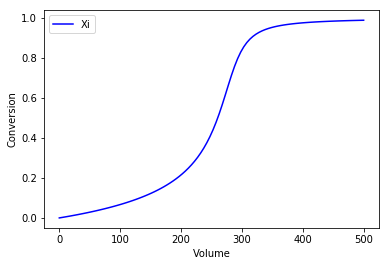

In [116]:
plt.figure(1)
plt.plot(Vspan, X, color='blue', label='Xi')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Volume') 
plt.show()

In [91]:
Conv85 = interp(-0.85,-X[::-1],Vspan[::-1])
print('PFR Volume required for 85% conversion= ',Conv85,'L')

PFR Volume required for 85% conversion=  302.21795898708683 L


Mole balance for CSTR:
\begin{align}
F_{A_{0}} - F_{A} + r_{A}V &= 0 \nonumber \\
F_{A_{0}}X - k_{i}C_{A}C_{B}V &= 0 \nonumber \\
QC_{A_{0}}X - k_{0}e^{\left(-\dfrac{E_{a}}{RT}\right)}C_{A}C_{B}V &= 0 \nonumber \\
QC_{A_{0}}X - k_{0}e^{\left(-\dfrac{E_{a}}{RT}\right)}(C_{A_{0}}(1 - X))^{2}V &= 0 \nonumber \\
QX &= k_{0}e^{\left(-\dfrac{E_{a}}{RT}\right)}C_{A_{0}}(1 - X)^{2}V \nonumber \\
V &= \dfrac{QXe^{\left(\dfrac{E_{a}}{RT}\right)}}{k_{0}C_{A_{0}}(1 - X)^{2}} \nonumber \\
\end{align}

In [117]:
X2=0.85
Tcstr = To - delHrx*X2/(2*CpA)
Vcstr = X2*Q*exp(Ea/(R*Tcstr))/(CAo*(1-X2)**2*Ko)
print('CSTR Volume required for 85% conversion= ',Vcstr,'L')

CSTR Volume required for 85% conversion=  173.70021403174118 L


**Question b)**

In [118]:
Tb = 550 #K
Xb = 1 #reaction to completion
Tob = Tb + delHrx*Xb/(2*CpA)
print('Max inlet T to avoid bp exceeded=',Tob,'Kelvin')

Max inlet T to avoid bp exceeded= 350.0 Kelvin


**Question c)**

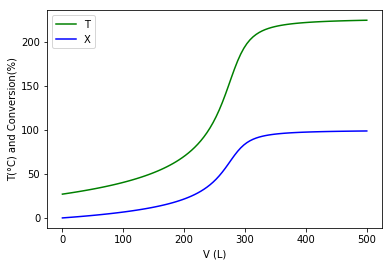

In [119]:
plt.figure(2)
plt.plot(Vspan, T-273.15, color = 'green', label = 'T')
plt.plot(Vspan, X*100, color = 'blue', label = 'X')
plt.xlabel('V (L)')
plt.ylabel('T(°C) and Conversion(%)')
plt.legend(loc='best')
#plt.grid()
plt.show()

**Question d)**

In [123]:
Vcstr = 500 #L
def CSTR500(var):
    X = var[0]
    Te = To - delHrx*X/(2*CpA)
    return[X - (Ko/Q)*exp(-Ea/(R*Te))*(CAo*(1-X)**2)*Vcstr]

In [124]:
from scipy.optimize import fsolve

In [125]:
Xcstr = fsolve(CSTR500,0.9)
Xf = Xcstr[-1]
print('Max conversion for 500CSTR=', Xf*100,'%')

Max conversion for 500CSTR= 92.13932367502295 %


In [126]:
Vcstr1 = 250 #L
def CSTR1(var1):
    X1 = var1[0]
    Te1 = To - delHrx*X1/(2*CpA)
    return[X1 - (Ko/Q)*exp(-Ea/(R*Te1))*(CAo*(1-X1)**2)*Vcstr1]
           
Xcstr1 = fsolve(CSTR1,0.9)
Xf1 = Xcstr1[-1]
Tf1 = To - delHrx*Xf1/(2*CpA)
print('Max conversion for 250CSTR=', Xf1*100,'%')
print('Tout of 250CSTR=', Tf1,'K')           

Max conversion for 250CSTR= 88.13477351900197 %
Tout of 250CSTR= 476.4195470380039 K


In [127]:
To1 = 350 #max feed temperature is 350K, therefore CSTR1 need be cooled before CSTR2
CAo1 = CAo*(1-Xf1)

In [130]:
Vcstr2 = 250 #L
def CSTR2(var2):
    X2 = var2[0]
    Te2 = To1 - delHrx*X2/(2*CpA)    
    return[X2 - (Ko/Q)*exp(-Ea/(R*Te2))*(CAo1*(1-X2)**2)*Vcstr2]
           
Xcstr2 = fsolve(CSTR2,0.9)
Xf2 = Xcstr2[-1]
Tf2 = To1 - delHrx*Xf2/(2*CpA)
print('Max conversion for 2nd 250CSTR=', Xf2*100,'%')
print('Tout of 250CSTR=', Tf2,'K') 

Max conversion for 2nd 250CSTR= 75.35183548379064 %
Tout of 250CSTR= 500.7036709675813 K


In [131]:
CAout = CAo1*(1-Xf2)
Tconv = -(CAout-CAo)/CAo
Tconv

0.9707543945674276

In [143]:
Xdspan = linspace(0,0.985, 1000)
Td = To - delHrx*Xdspan/(2*CpA)
kd = Ko*exp(-Ea/(R*Td)) 
ra = -kd*(CAo*(1-Xdspan))**2
rate = -1/ra

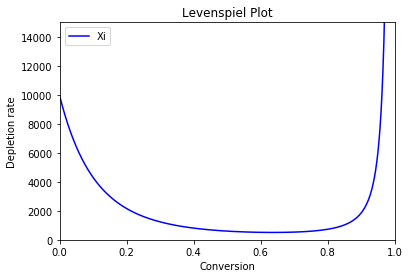

In [150]:
plt.figure(3)
plt.plot(Xdspan, rate, color='blue', label='Xi')
plt.legend(loc='best')
plt.axis([0, 1,0,15000])
plt.title('Levenspiel Plot')
plt.ylabel('Depletion rate') 
plt.xlabel('Conversion') 
plt.show()